In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import control as ctrl
from scipy.signal import butter, filtfilt, bilinear

print("Setup Complete")

Setup Complete


In [34]:
ppg_filepath = "../golden_data/ppg_golden_data.csv"

ppg_data = pd.read_csv(ppg_filepath, nrows=100000)

In [42]:

# Apply filter using coefficients in z-domain
def apply_filter(data, b, a):
    data = np.asarray(data, dtype=np.float64)  # Input: float64
    y = np.zeros_like(data, dtype=np.float64)  # Output: float64
    for i in range(len(data)):
        y[i] = b[0] * data[i]
        for j in range(1, len(b)):
            if i-j >= 0:
                y[i] += b[j] * data[i-j]
        for j in range(1, len(a)):
            if i-j >= 0:
                y[i] -= a[j] * y[i-j]
    return y


In [43]:
# LPF params:
# fs = 100.0
# ws = 12
# wp = 3
# wc = 4
# order = 4

b_z_low = [0.000177296607979, 0.000709186431917, 0.001063779647875, 0.000709186431917, 0.000177296607979]
a_z_low = [1, -3.349831562667920, 4.252610698953553, -2.420450670140820, 0.520508279582855]

# Apply LPF
low_pass_filtered_sig = apply_filter(ppg_data, b_z_low, a_z_low)

# HPF params:
# fs = 100.0
# ws = 0.0005
# wp = 0.01
# wc = 0.005
# order = 2

b_z_high = [0.999777886079662, -1.999555772159325, 0.999777886079662]
a_z_high = [1, -1.999555722824731, 0.999555821493919]

# Apply HPF
high_pass_filtered_sig = apply_filter(low_pass_filtered_sig, b_z_high, a_z_high)

filtered_sig = high_pass_filtered_sig

In [44]:
print(filtered_sig)
print(ppg_data)

[[1.73889341e-01]
 [1.45240122e+00]
 [6.04167992e+00]
 ...
 [9.29873120e+02]
 [9.59071683e+02]
 [9.85603366e+02]]
        975
0       981
1       984
2       989
3       992
4       994
...     ...
99995  2280
99996  2304
99997  2336
99998  2369
99999  2430

[100000 rows x 1 columns]


<Axes: >

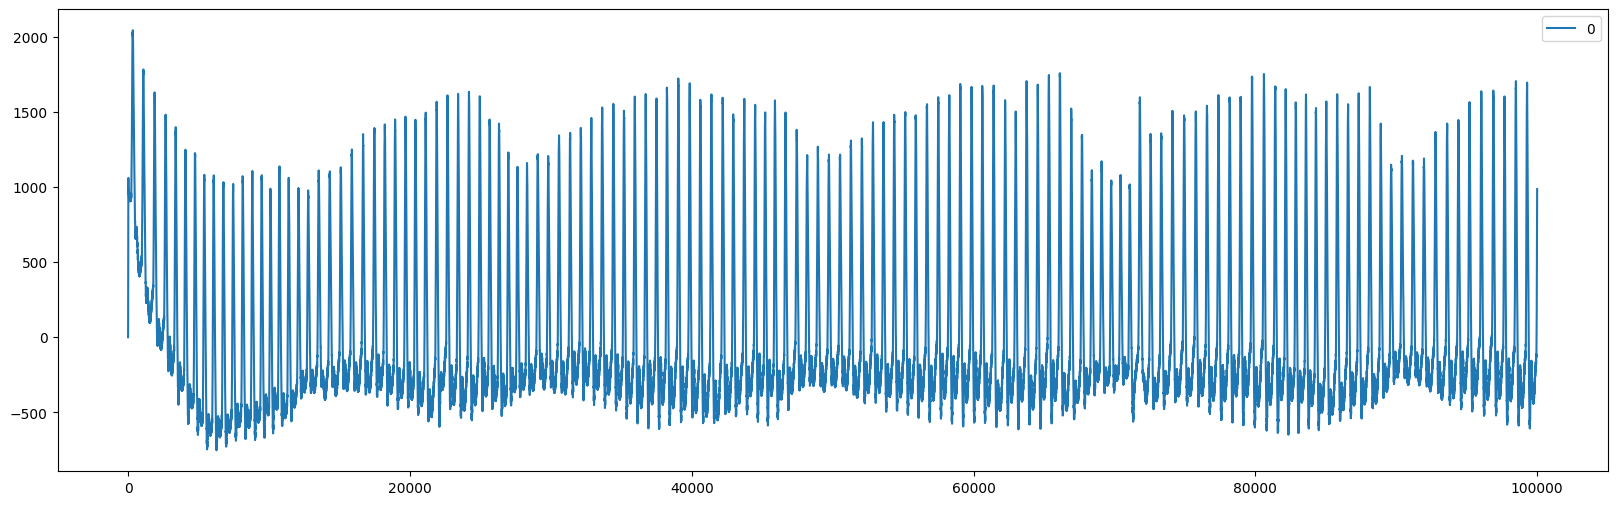

In [45]:
# Hiển thị tín hiệu trước và sau khi lọc
plt.figure(figsize=(20,6))
sns.lineplot(data=filtered_sig)